# K-MEANS CLUSTERING

## What is Clustering and K-Means?

Clustering - A typical and well-known type of unsupervised learning. Clustering algorithms try to find natural groupings in data. Similar data points (according to some notion of similarity) are considered in the same group. We call these groups clusters.

K-Means clustering is a simple and widely-used clustering algorithm. Given value of k , it tries to build k clusters from samples in the dataset.

### How does it work?

![alt text](http://i.imgur.com/nIhdPrS.jpg \"Logo Title Text 1\")


Given K, the K-means algorithm works as follows:

    1.Randomly choose K data points (seeds) to be the initial centroids
    2.Assign each data point to the closest centroid
    3.Re-compute (update) the centroids using the current cluster memberships
    4.If a convergence criterion is not met, go to step 2

 We can also terminate the algorithm when it reaches an iteration budget, which yields an approximate result. The algorithm is sensitive to the order in which data samples are explored, so run it several times to get varied orders, then average the cluster centers from each run and input those centers as ones for one final run analysis.

### How to determine the best value for k?

If you don't know how many cluster you want, use one of the method, **Elbow Method**.

One method to validate the number of clusters is the Elbow Method. The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k, and for each value of k calculate the sum of squared errors(SSE)

### The Spesification of The Problem

    1. Data Set
       In this problem, my data is divided by two. First one is Data Train and the visualization is like this:
![dataTrain](DataTrain.jpg)
       The second one is data test and the visualization is like this
![dataTes](DataTes.jpg)

    2. Library
       Some of libraries I use are :
* Numpy
* Matplotlib
* Scikit-Learn

In [62]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

I will load my data with Numpy:

In [63]:
#fungsi load data
def load_data(file):
    return np.loadtxt(file)

In [64]:
def save_data(filename,a):
    np.savetxt(filename,a)

    3. Method
    To find the distance between 2 points, I used an usual method, Euclidean Distance. The equation is
![euclidean](https://wikimedia.org/api/rest_v1/media/math/render/svg/dc0281a964ec758cca02ab9ef91a7f54ac00d4b7)

In [65]:
#fungsi euclidean sebagai method untuk mencari jarak
def euclidean(a,b):
    return np.linalg.norm(a-b)

   The second method I use is a method to find a best value of *k*. The method is **Elbow Method**. I use a library named Scikit-Learn to help me to find the best value of *k*. In this problem I set the value of *k* is 6. Because, I analyze that after 6 cluster, the difference value between SSE is insignificant. 

<function matplotlib.pyplot.show>

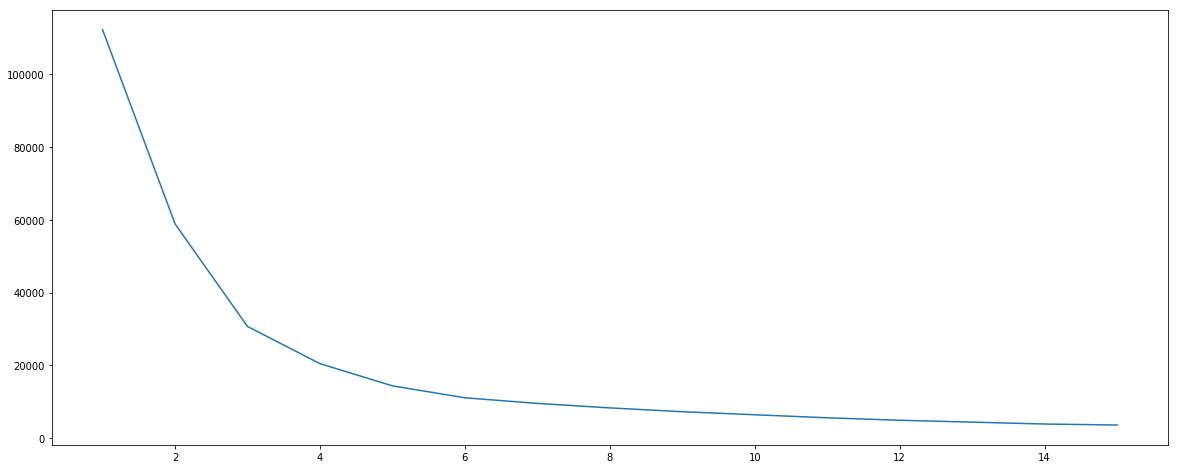

In [66]:
#load dataset
datasetTrain = load_data('TrainsetTugas2.txt')
#merupakan elbow method dengan menggunakan lib sklearn
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init=10, random_state=0).fit(datasetTrain)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,8))
plt.plot(range(1,16), wcss)
plt.show

    4. K-Means Algorithm

In [67]:
#fungsi utama kmeans dengan parameter jumlah cluster, centroid awal, dataset, jumlah instance, dan jumlah fitur
def kmeans(k,centroids,dataset, n_instances, n_features):
    #array history_centroid untuk menyimpan centroid pada setiap iterasi
    history_centroids = []
    #menggunakan euclidean untuk menghitung distance
    distance = euclidean
    #menyimpan centroid awal ke array history_centroids
    history_centroids.append(centroids)
    #membuat suatu array yang dapat menyimpan centroid lama 
    old_centroids = np.zeros(centroids.shape)
    #array belongs_to adalah array yang menyimpan hasil cluster setiap instances
    belongs_to = np.zeros((n_instances,1))
    #norm merupakan selisih antara centroid sekarang dengan centroid lama
    norm = distance(centroids,old_centroids)
    iteration = 0
    #looping sampai norm = 0 (konvergen)
    while norm > 0:
        iteration += 1
        #menyimpan centroid ke variabel centroid lama
        old_centroids = centroids
        #hitung setiap instance di dataset
        for idx_instance, instance in enumerate(dataset):
            #membuat array dengan index = k
            dist_vec = np.zeros((k,1))
            #looping untuk setiap index
            for idx_centroid, centroid in enumerate(centroids):
                #menyimpan jarak antara centroid dan titik setiap instance
                dist_vec[idx_centroid] = distance(centroid,instance)
            #menyimpan data cluster sesuai dengan instance
            belongs_to[idx_instance,0] = np.argmin(dist_vec)
        #temp_centroid adalah array pembantu untuk mengupdate centroid baru
        temp_centroids = np.zeros((k,n_features))
        for idx in range(len(centroids)):
            #mencari instance yang menjadi bagian dari cluster i
            instance_close = [i for i in range(len(belongs_to)) if belongs_to[i] == idx]
            #centroid di update dengan mencari rata-rata dari jarak centroid ke setiap titik instances di cluster tersebut
            centroid = np.mean(dataset[instance_close],axis=0)
            #menyimpan setiap centroid yang baru di update
            temp_centroids[idx, :] = centroid
        centroids = temp_centroids
        #menambahkan centroid yang baru di update ke array history_centroids
        history_centroids.append(temp_centroids)
        #mencari nilai norm terbaru
        norm = distance(centroids,old_centroids)
    #print("jumlah iterasi: "+str(iteration))
    return centroids, belongs_to

In [68]:
#fungsi yang digunakan menghitung jarak antara seluruh centroids dan titik anggota cluster
def sum_of_distance(dataset,centroids,belongs_to):
    total_sum=0
    #looping pada centroid
    for idx_cen,cen in enumerate(centroids):
        #memilih titik canggota cluster yang sesuai dengan idx_cen
        instance_close = [i for i in range(len(belongs_to)) if belongs_to[i] == idx_cen]
        #looping pada array instance_close
        for idx_inst, inst in enumerate(instance_close):
            #menghitung distance antara anggota cluster dan centroidnya
            dist = euclidean(cen,inst)
            total_sum += dist
    return total_sum

In [69]:
#fungsi untuk menvisualisasikan hasil cluster
def plot(dataset,arr_cluster,final_centroids):
    #plot data sesuai cluster
    plt.scatter(dataset[arr_cluster==0,0], dataset[arr_cluster==0,1], s=15, c='red', label='Cluster 1')
    plt.scatter(dataset[arr_cluster==1,0], dataset[arr_cluster==1,1], s=15, c='blue', label='Cluster 2')
    plt.scatter(dataset[arr_cluster==2,0], dataset[arr_cluster==2,1], s=15, c='green', label='Cluster 3')
    plt.scatter(dataset[arr_cluster==3,0], dataset[arr_cluster==3,1], s=15, c='darkcyan', label='Cluster 4')
    plt.scatter(dataset[arr_cluster==4,0], dataset[arr_cluster==4,1], s=15, c='darkmagenta', label='Cluster 5')
    plt.scatter(dataset[arr_cluster==5,0], dataset[arr_cluster==5,1], s=15, c='saddlebrown', label='Cluster 6')
    plt.scatter(final_centroids[:,0], final_centroids[:,1], s=15, c='black',label='Centroids')
    plt.show()

In [95]:
def execute(dataset):
    #mencari jumlah instance dan fitur
    n_instances, n_features = dataset.shape
    #lopping dilakukan sebanyak 10 kali
    n_iter=10
    best_of_sum = 99999999
    for iter in range(0,n_iter):
        #menentukan centroid
        centroids = dataset[np.random.randint(0,n_instances-1, size=6)]
        #memanggil fungsi kmeans
        final_centroids, belongs_to_centroid = kmeans(6,centroids,dataset,n_instances, n_features)
        #memanggil fungsi sum_of_distance
        total_sum = sum_of_distance(dataset,final_centroids,belongs_to_centroid)
        #mengganti ukuran array
        arr_cluster = np.array(belongs_to_centroid)
        arr_cluster.resize(n_instances,)
        #print(arr_cluster)
        #membandingkan total jarak yang baru dan yang terbaik sebelumnya
        if (best_of_sum > total_sum):
            #mengganti var best_of_sum, best_of_cluster, best_of_centroids yang total jaraknya lebih rendah
            best_of_sum = total_sum
            best_of_cluster = arr_cluster
            best_of_centroids = final_centroids
    #menampilkan hasil cluster dan jarak terbaik
    print("Best of Cluster: ")
    print(best_of_cluster)
    print("Best Distance: "+str(best_of_sum))
    #memanggil fungsi plot
    plot(dataset,arr_cluster,final_centroids)
    return best_of_cluster

I analyze that the program is a little not constant. And the result after I run the program with my data train set is like this:

c:\users\effen\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\effen\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Best of Cluster: 
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 3. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 5. 5. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

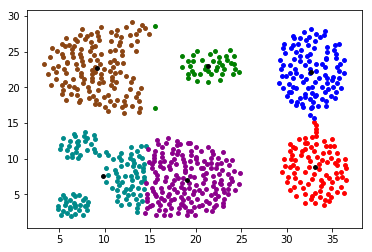

In [96]:
result = execute(datasetTrain)
save_data('HasilTrain.txt',result)

## The Implementation to Data Test

In [97]:
#load data test
datasetTest = load_data('TestsetTugas2.txt')

Best of Cluster: 
[0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 5. 5. 5. 5. 5. 5. 5. 1. 1. 1. 1. 2. 3. 3. 2. 2. 3. 3. 3.
 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 2. 2. 2. 2. 1. 4. 4. 1. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2.
 2. 2. 2. 2.]
Best Distance: 5262.715466247784


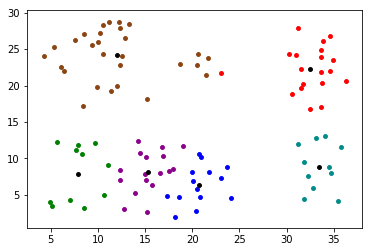

In [98]:
result_test = execute(datasetTest)
save_data('HasilTest.txt',result_test)

## Result and Analysis

The result of my program is in the HasilTrain.txt and HasilTest.txt file. And I analyze that K-Means is not always yield a constant result. It depends on the first centroids. But in my program, besides the loop to make my centroids converge, I also make another looping to run the main function of K-Means. The loop is to compare the result of SSE from the best one and another one. 